In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
iris_data = pd.read_csv('IRIS.csv')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


LABEL ENCODING

In [ ]:
label_encode = LabelEncoder()

In [ ]:
labels = label_encode.fit_transform(iris_data['species'])

In [ ]:
iris_data['Target'] = labels

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
iris_data['Target'].value_counts()

,count
Target,
0,50
1,50
2,50


0 --> setosa

1 --> versicolor

2 --> virginica

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
iris_data.drop(columns='species', axis=1, inplace=True)

COORELATION MATRIX

The value is in the range of -1 to 1. If two variables have high correlation then we can neglect one variable from those two.


In [ ]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
Target,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

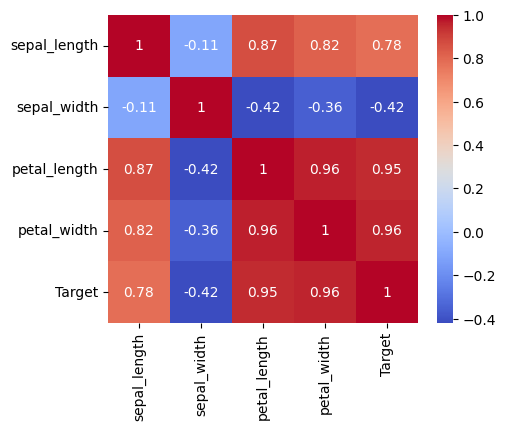

In [ ]:
corr = iris_data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [ ]:
X = iris_data.drop(columns=['Target'])
Y = iris_data['Target']

In [ ]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64


SPLITTING THE DATA INTO TRAINING AND TESTING DATA.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

STANDARDIZE THE DATA.

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_standardized = scaler.transform(X_train)

In [ ]:
print(X_train_standardized)

[[-0.04717658  2.19102181 -1.46020619 -1.31097023]
 [-1.30521861  0.78501851 -1.06028014 -1.31097023]
 [ 1.33666966  0.08201686  0.93935012  1.19659028]
 [ 0.95925705 -0.38665091  0.48229177  0.14077533]
 [-1.80843543 -0.38665091 -1.34594161 -1.31097023]
 [-0.8020018   1.01935239 -1.28880931 -1.31097023]
 [ 1.08506126 -0.15231702  0.71082095  0.6686828 ]
 [-1.68263122 -1.79265421 -1.4030739  -1.17899336]
 [ 0.70764865 -0.85531868  0.88221783  0.93263654]
 [ 0.45604024 -2.02698809  0.42515948  0.40472907]
 [ 0.70764865 -0.62098479  1.05361471  1.19659028]
 [-0.04717658 -0.85531868  0.08236572  0.00879846]
 [-1.55682702  1.25368628 -1.57447078 -1.31097023]
 [-0.927806    1.01935239 -1.34594161 -1.17899336]
 [ 0.33023603 -0.15231702  0.65368865  0.80065967]
 [ 0.70764865  0.31635074  0.42515948  0.40472907]
 [-0.927806    0.55068463 -1.17454473 -0.91503963]
 [ 0.20443183 -0.85531868  0.76795324  0.53670593]
 [-0.04717658 -0.85531868  0.76795324  0.93263654]
 [-0.55039339 -0.15231702  0.42

In [ ]:
X_test_standardized = scaler.transform(X_test)

In [ ]:
print(X_test_standardized)

[[-1.55682702  0.31635074 -1.34594161 -1.31097023]
 [-1.55682702  0.08201686 -1.28880931 -1.31097023]
 [-0.55039339  0.78501851 -1.28880931 -1.0470165 ]
 [-1.05361021 -0.15231702 -1.23167702 -1.31097023]
 [-0.17298078  3.12835735 -1.28880931 -1.0470165 ]
 [ 2.34310329 -1.08965256  1.79633452  1.46054402]
 [-0.42458919 -1.32398644  0.13949802  0.14077533]
 [-1.55682702  0.78501851 -1.34594161 -1.17899336]
 [ 0.58184444 -0.38665091  1.05361471  0.80065967]
 [ 1.08506126  0.08201686  0.36802719  0.2727522 ]
 [-0.29878498 -0.15231702  0.19663031  0.14077533]
 [-1.80843543 -0.15231702 -1.4030739  -1.31097023]
 [-0.04717658 -1.08965256  0.13949802  0.00879846]
 [-0.42458919 -1.79265421  0.13949802  0.14077533]
 [ 1.08506126  0.08201686  1.05361471  1.59252089]
 [-1.05361021  1.01935239 -1.4030739  -1.17899336]
 [ 0.58184444 -1.32398644  0.65368865  0.40472907]
 [ 2.34310329 -0.15231702  1.33927617  1.46054402]
 [-0.17298078 -1.32398644  0.71082095  1.06461341]
 [-1.80843543  0.31635074 -1.40

In [ ]:
print(X_train_standardized.std())

1.0


In [ ]:
print(X_test_standardized.std())

1.073087128606895


SVM CLASSIFIER

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


TRAINING AND TESTING.


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
trained_data = model.predict(X_train)

In [ ]:
test_data = model.predict(X_test)

In [ ]:
print(trained_data)

[0 0 2 1 0 0 2 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 2 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 2 2 0 0 2 1]


In [ ]:
print(test_data)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]


In [ ]:
training_accuracy = accuracy_score(trained_data, Y_train)
print(training_accuracy)

0.9666666666666667


In [ ]:
test_accuracy = accuracy_score(test_data, Y_test)
print(test_accuracy)

1.0


In [ ]:
#Cross-Validation
#For a more reliable performance estimate:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5)
print("CV Accuracy: ", scores.mean())


CV Accuracy:  0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PREDICTION

In [ ]:
input_data = (input('Enter the sepal length : '))
input_data1 = (input('Enter the sepal width : '))
input_data2 = (input('Enter the petal length : '))
input_data3 = (input('Enter the petal width : '))

#converting the data entered into numpy array.
input_data_as_numpy_array = np.array([input_data, input_data1, input_data2, input_data3])

#we are reshaping the data to make it in 1 to -1 range.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data.
std_data = scaler.transform(input_data_reshaped)
print('Standardize data : ',std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The species is setosa')
elif (prediction[0] == 1):
  print('The species is versicolor')
else:
  print('The species is virginica')

Enter the sepal length : 5.1
Enter the sepal width : 3.5
Enter the petal length : 1.4
Enter the petal width : 0.2
Standardize data :  [[-0.927806    1.01935239 -1.34594161 -1.31097023]]
[0]
The species is setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
